In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display

# Loadigng dataset

In [8]:
!curl -L -o playground-series-s5e8.zip https://huggingface.co/datasets/Daniyalpr/playground-s5e8/resolve/main/playground-series-s5e8.zip?download=true
!unzip playground-series-s5e8.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1383  100  1383    0     0   6577      0 --:--:-- --:--:-- --:--:--  6585
100 14.7M  100 14.7M    0     0  31.0M      0 --:--:-- --:--:-- --:--:--  109M
Archive:  playground-series-s5e8.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
df = pd.read_csv("train.csv")

# EDA

In [10]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [11]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


None

In [12]:
cat_feats = ["job", "marital", "education", "loan", "housing", "default"]
for feat in cat_feats:
  print(f"unique vals:{feat} --> {df[feat].unique()} ")

unique vals:job --> ['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed'] 
unique vals:marital --> ['married' 'single' 'divorced'] 
unique vals:education --> ['secondary' 'primary' 'tertiary' 'unknown'] 
unique vals:loan --> ['no' 'yes'] 
unique vals:housing --> ['no' 'yes'] 
unique vals:default --> ['no' 'yes'] 


## Visualizing

In [13]:
msk = df["y"] == 1

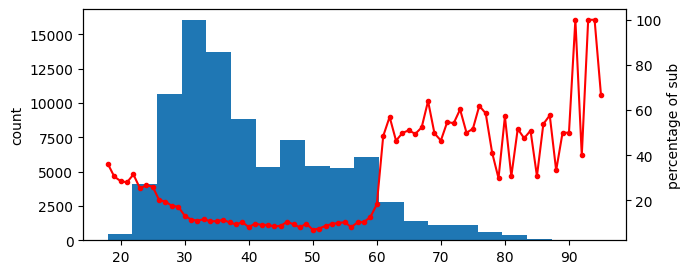

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize=(1 * 7, 3))
ax1.hist(df.loc[msk, "age"], bins=20)
ax1.set_ylabel("count")
ax2 = ax1.twinx()
ax2.plot(df.groupby("age")["y"].mean() * 100, color="red", marker=".")
ax2.set_ylabel("percentage of sub")
plt.show()

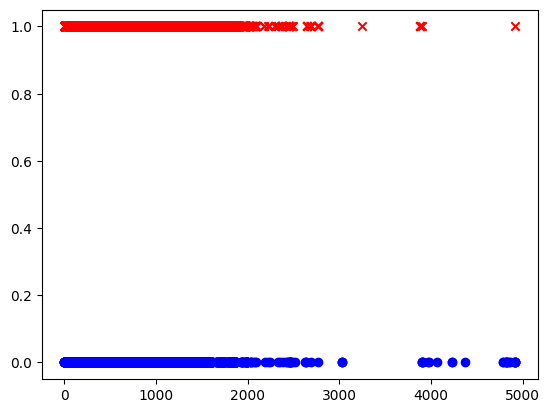

In [15]:
plt.scatter(df.loc[msk, "duration"], np.full(msk.sum(), 1), color="red", marker="x")
plt.scatter(df.loc[~msk, "duration"], np.full((~msk).sum(), 0), color="blue", marker="o")
plt.show()

<Axes: xlabel='duration_bin'>

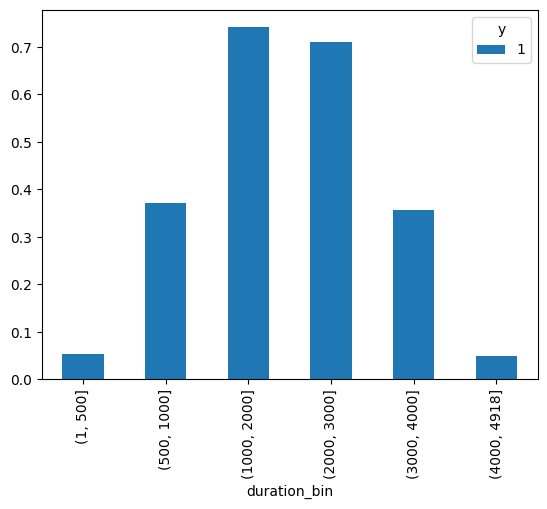

In [16]:
bins = [df["duration"].min(), 500, 1000, 2000, 3000, 4000, df["duration"].max()]
df["duration_bin"] = pd.cut(df["duration"], bins)
cross = pd.crosstab(df["duration_bin"], df["y"], normalize="index")
cross = cross.drop(columns=0)
cross.plot(kind="bar")

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


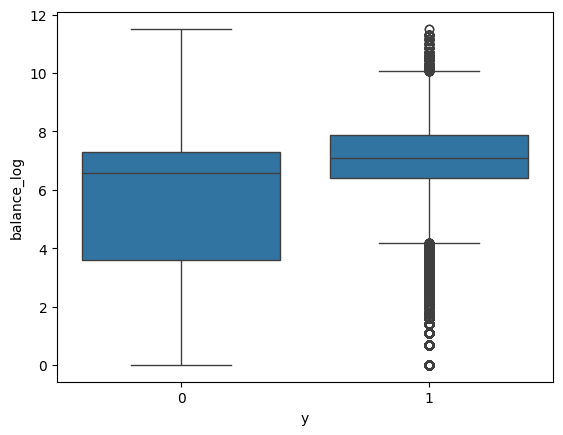

In [17]:
df["balance_log"] = np.log1p(df["balance"])
sns.boxplot(x="y", y="balance_log", data=df)
plt.show()

<Axes: xlabel='balance_bin'>

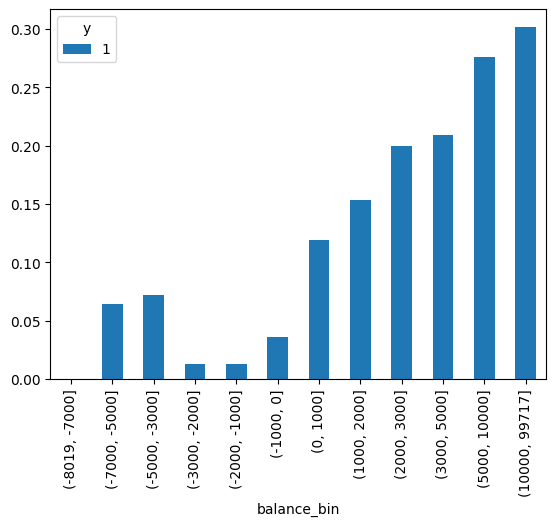

In [18]:
bins = [df["balance"].min(), -7000, -5000, -3000, -2000, -1000, 0, 1000, 2000, 3000, 5000, 10000, df["balance"].max()]
df["balance_bin"] = pd.cut(df["balance"], bins)
cross = pd.crosstab(df["balance_bin"], df["y"], normalize="index")
cross = cross.drop(columns=0)
cross.plot(kind="bar")

<Axes: xlabel='balance_age_bin'>

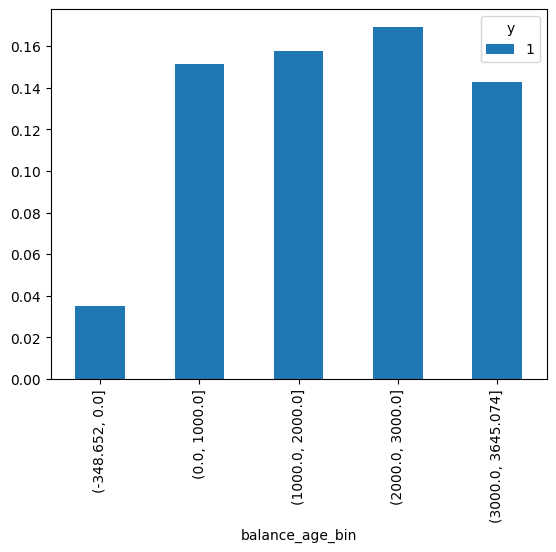

In [19]:
df["balance_age"] = df["balance"]/df["age"]
bins = [df["balance_age"].min(), 0, 1000, 2000, 3000, df["balance_age"].max()]
df["balance_age_bin"] = pd.cut(df["balance_age"], bins)
cross = pd.crosstab(df["balance_age_bin"], df["y"], normalize="index")
cross = cross.drop(columns=0)
cross.plot(kind="bar")

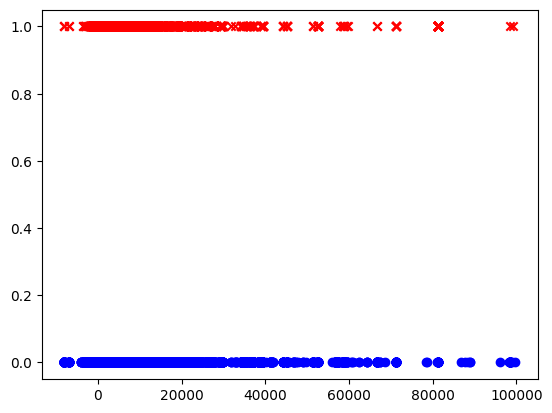

In [20]:
plt.scatter(df.loc[msk, "balance"], np.full(msk.sum(), 1), color="red", marker="x")
plt.scatter(df.loc[~msk, "balance"], np.full((~msk).sum(), 0), color="blue", marker="o")
plt.show()

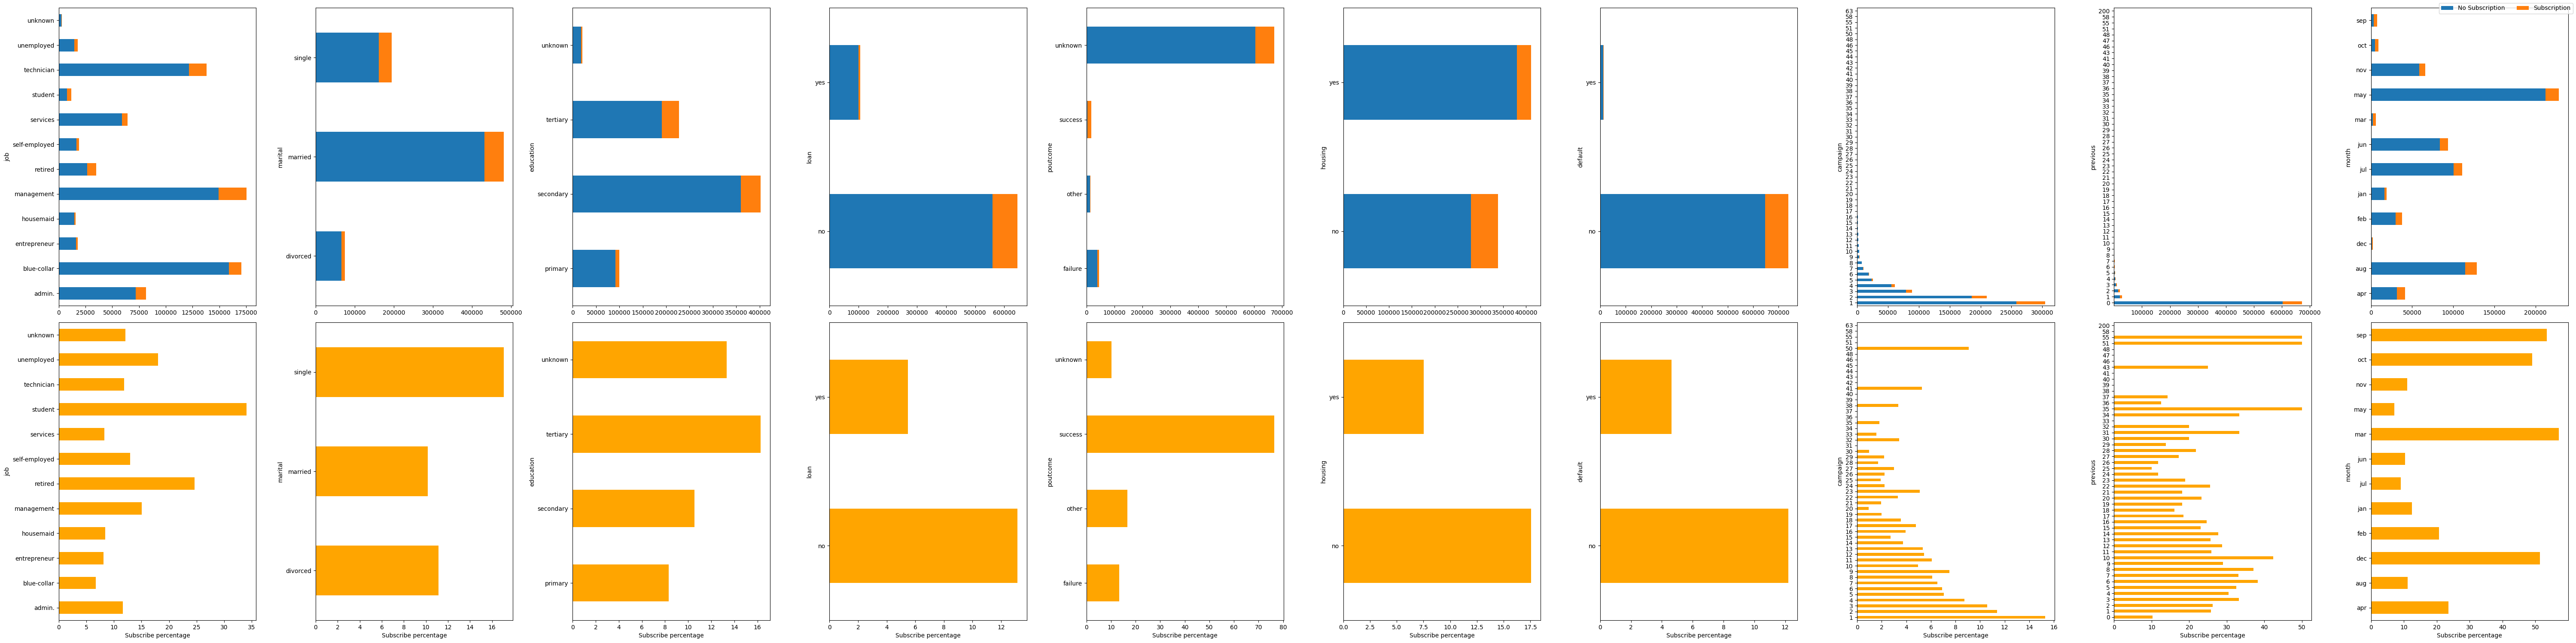

In [22]:
_feats = ["job", "marital", "education", "loan", "poutcome", "housing", "default", "campaign", "previous", "month"]
n = len(_feats)
fig, ax = plt.subplots(2, n, figsize=(n * 6, n * 1.5))
for i,feat in enumerate(_feats):
  cross = pd.crosstab(df[feat], df["y"])
  cross.plot.barh(stacked=True, ax=ax[0, i], legend=False)
  cross = pd.crosstab(df[feat], df["y"], normalize="index")
  (cross[1] * 100).plot.barh(ax=ax[1, i], color="orange")
  ax[1, i].set_xlabel("Subscribe percentage")

handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, ["No Subscription", "Subscription"], loc="upper right", ncol = 2)
plt.tight_layout()
plt.show()

# Preprocessing

In [23]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def poutcome_combine(x):
  out = x.copy()
  out["poutcome"] = out["poutcome"].replace({"unknown":"not_successful", "other":"not_successful"})
  return out
def add_season(x):
  month_to_season = {
      "jan": "winter", "feb": "winter", "dec": "winter",
      "mar": "spring", "apr": "spring", "may": "spring",
      "jun": "summer", "jul": "summer", "aug": "summer",
      "sep": "autumn", "oct": "autumn", "nov": "autumn",
  }
  out = x.copy()
  out["season"] = out["month"].replace(month_to_season)
  return out
def balance_age(x):
  out = x.copy()
  out["balance_age"] = out["balance"]/out["age"]
  return out

num_trans = Pipeline([
    ("scaler", MinMaxScaler())
])
cat_trans = Pipeline(
    [
        ("combine", FunctionTransformer(poutcome_combine)),
        ("imputer", SimpleImputer(missing_values="unknown", strategy="most_frequent")),
        ("encoder", OneHotEncoder(drop="if_binary"))
    ]
)
def square(x):
  out = x.copy()
  square_out = out ** 2
  out = pd.concat([out, square_out],axis=1)
  return out


ct = ColumnTransformer(
    [
        #("square", FunctionTransformer(square), ["duration"]),
        ("num", num_trans, ["age", "balance", "campaign", "balance_age", "duration"]),
        ("cat", cat_trans, ["job", "marital", "education", "loan", "default", "housing", "poutcome", "month", "season"])
    ]
)
pp = Pipeline([
    ("season", FunctionTransformer(add_season)),
    ("balance/age", FunctionTransformer(balance_age)),
    ("transform by columns", ct)
])

## Oversampling
We use the original bank dataset to collect more data

In [24]:
!curl -L -o real-bank-dataset.zip https://www.kaggle.com/api/v1/datasets/download/sushant097/bank-marketing-dataset-full && unzip real-bank-dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  511k  100  511k    0     0   899k      0 --:--:-- --:--:-- --:--:--  899k
Archive:  real-bank-dataset.zip
  inflating: bank-full.csv           


In [25]:
real_bank_data = pd.read_csv("bank-full.csv", sep=";")
real_bank_data["y"] = real_bank_data["y"].apply(lambda x: 1 if x == "yes" else 0)

## Splitting Data

In [26]:
train_df = df.sample(frac=.8, random_state=42)
test_df = df.drop(labels=train_df.index)
train_df = pd.concat([train_df, real_bank_data])

x_train = pp.fit_transform(train_df.drop(columns="y")).toarray()
y_train = train_df["y"].to_numpy()
x_test = pp.transform(test_df.drop(columns="y")).toarray()
y_test = test_df["y"].to_numpy()

# Model

In [27]:
import numpy as np
from typing import Literal
small = 1e-9
class LogisticRegression():
  def __init__(self, n_features):
    self.w = np.random.rand(n_features)
    self.b = np.random.rand()
    self.treshold = 0.5
  @staticmethod
  def sigmoid(z):
    return (1/(1+np.exp(-z)))

  def predict_proba(self, x):
    z = x @ self.w + self.b
    proba = LogisticRegression.sigmoid(z)
    return proba

  def predict(self, x):
    prediction = (self.predict_proba(x) >= self.treshold).astype(int)
    return prediction


  def _apply_treshold(self, y_hat_proba):
    out = (y_hat_proba >= self.treshold).astype(int)
    return out

  def fit(self, x, y, epochs, lr=1e-3, batch_size=None, class_weights:dict={0:1, 1:1}, shuffle=True):
    n = len(x)
    batch_size = batch_size or n
    for epoch in range(epochs):
      random_idx = np.random.permutation(n)
      for start in range(0, n, batch_size):
        end = start + batch_size
        x_batch = x[random_idx[start:end]] if shuffle else x[start:end]
        y_batch = y[random_idx[start:end]] if shuffle else y[start:end]
        y_hat = self.predict_proba(x_batch)
        error = y_hat - y_batch
        loss_weights = np.where(y_batch==1, class_weights[1], class_weights[0])
        w_error = error * loss_weights
        dw = (x_batch.T @ w_error)/len(x_batch)
        db = w_error.mean()
        self.w -= lr*dw
        self.b -= lr*db

      print(f"epoch {epoch} | BCE: {self.metric(x, y, "BCE")} | acc: {self.metric(x, y, "accuracy")} | F1: {self.metric(x, y, "PosF1")}")


  def metric(self, x, y, metric:Literal["accuracy", "BCE", "PosRecall", "PosPrecision"]):
    n = len(y)
    y_hat = self.predict_proba(x)
    predictions = self._apply_treshold(y_hat)
    TP = ((y==1) & (predictions==y)).sum()
    TN = ((y==0) & (predictions==y)).sum()
    FP = ((y==0) & (predictions!=y)).sum()
    FN = ((y==1) & (predictions!=y)).sum()
    if metric=="accuracy":
      return (TP + TN)/n
    elif metric == "BCE":
      loss = y * np.log(y_hat + small) + (1-y) * np.log(1-y_hat + small)
      BCE = loss.mean() * -1
      return BCE
    elif metric=="PosRecall":
      return TP/(TP + FN) if TP + FN != 0 else 1
    elif metric=="PosPrecision":
      return TP/(TP + FP) if TP + FP != 0 else 1
    elif metric=="PosF1":
      Pre = self.metric(x, y, "PosPrecision")
      Rec = self.metric(x, y, "PosRecall")
      return (2 * Pre * Rec/(Pre + Rec))
  def __call__(self, x):
    return self.predict(x)

In [28]:
lgr = LogisticRegression(x_train.shape[1])

In [29]:
lgr.fit(x_train, y_train, 10, batch_size=32, class_weights={0:1, 1:6})

epoch 0 | BCE: 0.5175351776580698 | acc: 0.7911101949594783 | F1: 0.39697183917817286
epoch 1 | BCE: 0.4989593139537279 | acc: 0.8056697731439793 | F1: 0.4251341066434368
epoch 2 | BCE: 0.4790023896577743 | acc: 0.8265544139824027 | F1: 0.45467436590892474
epoch 3 | BCE: 0.4756310822658301 | acc: 0.8325354031471875 | F1: 0.4731478501701725
epoch 4 | BCE: 0.461119874603351 | acc: 0.8455869475256932 | F1: 0.493319974978513
epoch 5 | BCE: 0.45663675423109323 | acc: 0.848933139701586 | F1: 0.5059607079861322
epoch 6 | BCE: 0.4526275763077655 | acc: 0.8522343853406095 | F1: 0.5176614624965851
epoch 7 | BCE: 0.4381272190996699 | acc: 0.8619800344383465 | F1: 0.533426942744572
epoch 8 | BCE: 0.43311682369384874 | acc: 0.8652998786443504 | F1: 0.5440810802303988
epoch 9 | BCE: 0.4242457432437054 | acc: 0.86969069033231 | F1: 0.5534873099412099


In [30]:
x = x_test
y = y_test
acc = lgr.metric(x, y, "accuracy")
Recall = lgr.metric(x, y, "PosRecall")
f1 = lgr.metric(x, y, "PosF1")
print(f"Accuracy: {acc:.2f} | Recall: {Recall} | F1: {f1}")

Accuracy: 0.87 | Recall: 0.6744522300077855 | F1: 0.5562154601114448


finding a good treshold

In [31]:
tresholds = np.linspace(0.1, 0.9, 10)
for t in tresholds:
  lgr.treshold = t
  acc = lgr.metric(x_test, y_test, "accuracy")
  Recall = lgr.metric(x, y, "PosRecall")
  Pre = lgr.metric(x, y, "PosPrecision")
  f1 = lgr.metric(x, y, "PosF1")
  print(f"test | tresh: {t:.2f} | Accuracy: {acc:.2f} | Recall: {Recall:.2f} | Pre: {Pre:.2f}| F1: {f1:.2f}")

test | tresh: 0.10 | Accuracy: 0.13 | Recall: 1.00 | Pre: 0.12| F1: 0.22
test | tresh: 0.19 | Accuracy: 0.32 | Recall: 0.99 | Pre: 0.15| F1: 0.26
test | tresh: 0.28 | Accuracy: 0.55 | Recall: 0.96 | Pre: 0.21| F1: 0.34
test | tresh: 0.37 | Accuracy: 0.74 | Recall: 0.87 | Pre: 0.30| F1: 0.45
test | tresh: 0.46 | Accuracy: 0.84 | Recall: 0.75 | Pre: 0.42| F1: 0.54
test | tresh: 0.54 | Accuracy: 0.88 | Recall: 0.60 | Pre: 0.52| F1: 0.55
test | tresh: 0.63 | Accuracy: 0.90 | Recall: 0.45 | Pre: 0.60| F1: 0.52
test | tresh: 0.72 | Accuracy: 0.90 | Recall: 0.32 | Pre: 0.67| F1: 0.44
test | tresh: 0.81 | Accuracy: 0.90 | Recall: 0.22 | Pre: 0.74| F1: 0.34
test | tresh: 0.90 | Accuracy: 0.89 | Recall: 0.13 | Pre: 0.80| F1: 0.22


# Predicting For Competition

In [32]:
pred_df = pd.read_csv("test.csv")

In [33]:
proba = lgr.predict_proba(pp.transform(pred_df).toarray())

In [34]:
ans = pd.DataFrame({"id":pred_df["id"], "y":proba})
ans.to_csv("ans.csv", index=False)